# 10. Introdução a Machine Learning: Classificação

# Pergunta
Com este conjunto de dados que inclui o número de médicos e enfermeiros em várias especialidades será que consigo estimar se essa unidade em particular tem serviço de cirurgia? 
<br>Coluna **t_cirurgia** criada a partir da coluna **C21071** que deve ser retirada depois de criada a etiqueta

# 11. Classificação usando uma Árvore

In [1]:
import numpy as np
import pandas as pd

In [2]:
%pwd

'C:\\Users\\sonia.quaresma\\PythonPlayground'

In [3]:
datadir ="datasets\\"
filename = "df_prep.csv"

In [4]:
df_hosp = pd.read_csv(f"{datadir}{filename}", index_col=0, verbose = False, encoding='latin-1')
df_hosp.head()

,NORDEM,NUTS2,C10001,C20001,C21001,C21011,C21021,C21031,C21041,C21061,...,C31001,C31011,C31021,C31031,C31041,C31051,C31061,C31071,C32001,t_cirurgia
ANO,,,,,,,,,,,,,,,,,,,,,
2012.0,229.0,17.0,1458.0,247.0,159.00,2.0,11.0,0.0,5.0,0.0,...,39.0,8.0,19.0,2.0,2.0,3.0,5.0,0.0,454.0,yes
2012.0,206.0,17.0,144.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,no
2012.0,65.0,16.0,894.0,111.0,38.25,0.0,8.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,337.0,yes
2012.0,106.0,17.0,801.0,166.0,108.00,0.0,12.0,0.0,7.0,0.0,...,36.0,4.0,16.0,5.0,2.0,2.0,7.0,0.0,228.0,yes
2012.0,209.0,11.0,221.0,13.0,13.00,0.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,1.0,0.0,1.0,6.0,0.0,80.0,yes


In [5]:
df_hosp = df_hosp.reset_index()

In [6]:
df = df_hosp.drop(columns='C21071', axis=1)

In [7]:
df['t_cirurgia'] = df['t_cirurgia'].fillna(0)

In [8]:
df['t_cirurgia'] = df['t_cirurgia'].replace({'yes': 1, 'no': 0})

In [9]:
df

,ANO,NORDEM,NUTS2,C10001,C20001,C21001,C21011,C21021,C21031,C21041,...,C31001,C31011,C31021,C31031,C31041,C31051,C31061,C31071,C32001,t_cirurgia
0,2012.0,229.0,17.0,1458.0,247.0,159.00,2.0,11.0,0.0,5.0,...,39.0,8.0,19.0,2.0,2.0,3.0,5.0,0.0,454.0,1
1,2012.0,206.0,17.0,144.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,0
2,2012.0,65.0,16.0,894.0,111.0,38.25,0.0,8.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,337.0,1
3,2012.0,106.0,17.0,801.0,166.0,108.00,0.0,12.0,0.0,7.0,...,36.0,4.0,16.0,5.0,2.0,2.0,7.0,0.0,228.0,1
4,2012.0,209.0,11.0,221.0,13.0,13.00,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,1.0,0.0,1.0,6.0,0.0,80.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [10]:
df1 = df.dropna()

In [11]:
df1.describe()

,ANO,NORDEM,NUTS2,C10001,C20001,C21001,C21011,C21021,C21031,C21041,...,C31001,C31011,C31021,C31031,C31041,C31051,C31061,C31071,C32001,t_cirurgia
count,86.0,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,...,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,2012.0,118.081395,14.976744,642.744186,113.872093,73.979651,0.813953,6.941860,0.360465,2.953488,...,22.941860,3.127907,6.220930,4.476744,3.465116,0.965116,3.465116,1.220930,189.348837,0.488372
std,0.0,68.264230,3.620129,809.928453,172.413511,108.256016,2.144825,10.384779,1.146994,5.346592,...,26.911775,4.752204,10.678622,5.740930,8.559409,1.482825,4.421066,2.783993,240.396475,0.502797
min,2012.0,3.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.0,57.500000,11.000000,120.250000,7.750000,6.000000,0.000000,0.000000,0.000000,0.000000,...,3.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000
50%,2012.0,119.000000,16.000000,338.500000,42.500000,33.000000,0.000000,2.000000,0.000000,0.000000,...,10.000000,0.000000,0.000000,3.000000,1.000000,0.000000,2.000000,0.000000,85.500000,0.000000
75%,2012.0,175.750000,17.000000,872.500000,162.500000,115.500000,0.000000,10.750000,0.000000,3.750000,...,35.750000,4.000000,11.000000,6.000000,3.000000,1.000000,5.000000,1.000000,282.250000,1.000000
max,2012.0,229.000000,30.000000,5325.000000,1161.000000,719.000000,13.000000,51.000000,6.000000,31.000000,...,103.000000,21.000000,50.000000,28.000000,72.000000,6.000000,19.000000,15.000000,1515.000000,1.000000


In [12]:
# conta o nº de diferentes valores na coluna
df1['t_cirurgia'].nunique()

2

In [13]:
df1

,ANO,NORDEM,NUTS2,C10001,C20001,C21001,C21011,C21021,C21031,C21041,...,C31001,C31011,C31021,C31031,C31041,C31051,C31061,C31071,C32001,t_cirurgia
0,2012.0,229.0,17.0,1458.0,247.0,159.00,2.0,11.0,0.0,5.0,...,39.0,8.0,19.0,2.0,2.0,3.0,5.0,0.0,454.0,1
1,2012.0,206.0,17.0,144.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,0
2,2012.0,65.0,16.0,894.0,111.0,38.25,0.0,8.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,337.0,1
3,2012.0,106.0,17.0,801.0,166.0,108.00,0.0,12.0,0.0,7.0,...,36.0,4.0,16.0,5.0,2.0,2.0,7.0,0.0,228.0,1
4,2012.0,209.0,11.0,221.0,13.0,13.00,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,1.0,0.0,1.0,6.0,0.0,80.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,2012.0,3.0,17.0,96.0,13.0,10.00,0.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,3.0,1.0,4.0,1.0,20.0,0
82,2012.0,67.0,17.0,191.0,42.0,42.00,0.0,1.0,0.0,2.0,...,5.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,27.0,0
83,2012.0,44.0,11.0,66.0,21.0,16.00,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,8.0,0
84,2012.0,85.0,11.0,491.0,132.0,76.00,0.0,4.0,1.0,3.0,...,6.0,0.0,1.0,3.0,0.0,1.0,1.0,0.0,93.0,0


In [14]:
df1.isnull().any()

ANO           False
NORDEM        False
NUTS2         False
C10001        False
C20001        False
              ...  
C31051        False
C31061        False
C31071        False
C32001        False
t_cirurgia    False
Length: 62, dtype: bool

## 11.1 Information Gain - Entropia

In [15]:
import warnings
warnings.filterwarnings("ignore")

def compute_impurity(feature, impurity_criterion):
    """
    This function calculates impurity of a feature.
    Supported impurity criteria: 'entropy', 'gini'
    input: feature (this needs to be a Pandas series)
    output: feature impurity
    """
    probs = feature.value_counts(normalize=True)
    
    if impurity_criterion == 'entropy':
        impurity = -1 * np.sum(np.log2(probs) * probs)
    elif impurity_criterion == 'gini':
        impurity = 1 - np.sum(np.square(probs))
    else:
        raise ValueError('Unknown impurity criterion')
        
    return(round(impurity, 3))


# Exemplos
print('impurity using entropy:', compute_impurity(df1['t_cirurgia'], 'entropy'))
print('impurity using gini index:', compute_impurity(df1['t_cirurgia'], 'gini'))


impurity using entropy: 1.0
impurity using gini index: 0.5


In [16]:
for level in df1['NUTS2'].unique():
    print('level name:', level)
    df_feature_level = df1[df1['NUTS2']== level]
    print('corresponding data partition:')
    print(df_feature_level.head(5))
    print('partition target feature impurity:', compute_impurity(df_feature_level['t_cirurgia'], 'entropy'))
    print('partition weight:', str(len(df_feature_level)) + '/' + str(len(df1)))
    print('====================')

level name: 17.0
corresponding data partition:
       ANO  NORDEM  NUTS2  C10001  C20001  C21001  C21011  C21021  C21031  \
0   2012.0   229.0   17.0  1458.0   247.0   159.0     2.0    11.0     0.0   
1   2012.0   206.0   17.0   144.0     0.0     0.0     0.0     0.0     0.0   
3   2012.0   106.0   17.0   801.0   166.0   108.0     0.0    12.0     0.0   
21  2012.0   151.0   17.0  2587.0   529.0   337.0     3.0    32.0     0.0   
27  2012.0    12.0   17.0    71.0     7.0     7.0     0.0     0.0     0.0   

    C21041  ...  C31001  C31011  C31021  C31031  C31041  C31051  C31061  \
0      5.0  ...    39.0     8.0    19.0     2.0     2.0     3.0     5.0   
1      0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3      7.0  ...    36.0     4.0    16.0     5.0     2.0     2.0     7.0   
21    14.0  ...    40.0     8.0    11.0     6.0     3.0     0.0     0.0   
27     0.0  ...     4.0     0.0     0.0     0.0     4.0     0.0     0.0   

    C31071  C32001  t_cirurgia  
0     

In [17]:
def comp_feature_information_gain(df, target, descriptive_feature, split_criterion):
    """
    This function calculates information gain for splitting on 
    a particular descriptive feature for a given dataset
    and a given impurity criteria.
    Supported split criterion: 'entropy', 'gini'
    """
    
    print('target feature:', target)
    print('descriptive_feature:', descriptive_feature)
    print('split criterion:', split_criterion)
            
    target_entropy = compute_impurity(df[target], split_criterion)
    print('the target entropy is', target_entropy)

    # we define two lists below:
    # entropy_list to store the entropy of each partition
    # weight_list to store the relative number of observations in each partition
    entropy_list = list()
    weight_list = list()
    
    # loop over each level of the descriptive feature
    # to partition the dataset with respect to that level
    # and compute the entropy and the weight of the level's partition
    for level in df[descriptive_feature].unique():
        df_feature_level = df[df[descriptive_feature] == level]
        entropy_level = compute_impurity(df_feature_level[target], split_criterion)
        entropy_list.append(round(entropy_level, 3))
        weight_level = len(df_feature_level) / len(df)
        print('the level is {} and the weight is {}'.format(level, weight_level))
        weight_list.append(round(weight_level, 3))

    print('impurity of partitions:', entropy_list)
    print('weights of partitions:', weight_list)

    feature_remaining_impurity = np.sum(np.array(entropy_list) * np.array(weight_list))
    print('remaining impurity:', feature_remaining_impurity)
    
    information_gain = target_entropy - feature_remaining_impurity
    print('information gain:', information_gain)
    
    print('====================')

    return(information_gain)

Vamos ver que a variável do Número de Pessoal ao Serviço - Total **C10001** é bastante promissora para faser a divisão do espaço, <br>
e a variável do Número de Médicos - Total **C20001** é bastante melhor do que o Número de Médicos - Especialistas - Anatomia Patológica - Total **C21011**

In [18]:
split_criterion = 'entropy'
for feature in df1.drop(columns=['t_cirurgia','ANO','NORDEM']).columns:
    feature_info_gain = comp_feature_information_gain(df1, 't_cirurgia', feature, split_criterion)

target feature: t_cirurgia
descriptive_feature: NUTS2
split criterion: entropy
the target entropy is 1.0
the level is 17.0 and the weight is 0.23255813953488372
the level is 16.0 and the weight is 0.29069767441860467
the level is 11.0 and the weight is 0.3488372093023256
the level is 30.0 and the weight is 0.023255813953488372
the level is 20.0 and the weight is 0.011627906976744186
the level is 18.0 and the weight is 0.06976744186046512
the level is 15.0 and the weight is 0.023255813953488372
impurity of partitions: [1.0, 0.99, 1.0, 1.0, -0.0, 0.918, -0.0]
weights of partitions: [0.233, 0.291, 0.349, 0.023, 0.012, 0.07, 0.023]
remaining impurity: 0.9573499999999999
information gain: 0.04265000000000008
target feature: t_cirurgia
descriptive_feature: C10001
split criterion: entropy
the target entropy is 1.0
the level is 1458.0 and the weight is 0.011627906976744186
the level is 144.0 and the weight is 0.011627906976744186
the level is 894.0 and the weight is 0.011627906976744186
the le

the level is 2.0 and the weight is 0.06976744186046512
the level is 4.0 and the weight is 0.046511627906976744
the level is 6.0 and the weight is 0.011627906976744186
the level is 5.0 and the weight is 0.03488372093023256
the level is 8.0 and the weight is 0.011627906976744186
the level is 3.0 and the weight is 0.023255813953488372
the level is 13.0 and the weight is 0.011627906976744186
impurity of partitions: [0.918, 0.997, 1.0, -0.0, -0.0, 0.918, -0.0, 1.0, -0.0]
weights of partitions: [0.07, 0.721, 0.07, 0.047, 0.012, 0.035, 0.012, 0.023, 0.012]
remaining impurity: 0.908227
information gain: 0.091773
target feature: t_cirurgia
descriptive_feature: C21121
split criterion: entropy
the target entropy is 1.0
the level is 0.0 and the weight is 0.8488372093023255
the level is 1.0 and the weight is 0.046511627906976744
the level is 2.0 and the weight is 0.023255813953488372
the level is 4.0 and the weight is 0.011627906976744186
the level is 3.0 and the weight is 0.023255813953488372
the 

the level is 2.0 and the weight is 0.023255813953488372
the level is 4.0 and the weight is 0.09302325581395349
the level is 5.0 and the weight is 0.023255813953488372
the level is 28.0 and the weight is 0.011627906976744186
the level is 39.0 and the weight is 0.011627906976744186
impurity of partitions: [-0.0, 0.99, 0.991, -0.0, 1.0, -0.0, -0.0, -0.0, 1.0, 1.0, -0.0, -0.0]
weights of partitions: [0.035, 0.605, 0.105, 0.023, 0.047, 0.012, 0.012, 0.023, 0.093, 0.023, 0.012, 0.012]
remaining impurity: 0.866005
information gain: 0.13399499999999998
target feature: t_cirurgia
descriptive_feature: C21381
split criterion: entropy
the target entropy is 1.0
the level is 5.0 and the weight is 0.03488372093023256
the level is 0.0 and the weight is 0.4883720930232558
the level is 3.0 and the weight is 0.10465116279069768
the level is 4.0 and the weight is 0.08139534883720931
the level is 8.0 and the weight is 0.03488372093023256
the level is 13.0 and the weight is 0.011627906976744186
the level is

the level is 18.0 and the weight is 0.011627906976744186
the level is 10.0 and the weight is 0.011627906976744186
the level is 5.0 and the weight is 0.011627906976744186
the level is 3.0 and the weight is 0.011627906976744186
the level is 22.0 and the weight is 0.011627906976744186
the level is 50.0 and the weight is 0.011627906976744186
the level is 20.0 and the weight is 0.011627906976744186
the level is 14.0 and the weight is 0.011627906976744186
impurity of partitions: [0.918, 0.985, -0.0, -0.0, -0.0, -0.0, -0.0, 0.918, -0.0, -0.0, -0.0, -0.0, 1.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0]
weights of partitions: [0.035, 0.57, 0.012, 0.012, 0.012, 0.023, 0.012, 0.07, 0.023, 0.012, 0.012, 0.012, 0.047, 0.012, 0.023, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012, 0.012]
remaining impurity: 0.7048399999999999
information gain: 0.2951600000000001
target feature: t_cirurgia
descriptive_feature: C31031
split criterion: entropy
the target entro

## 11.2 Árvores de Classificação

In [19]:
# define a variável target e os predictors
X = df1.drop(columns=['t_cirurgia'])
y = df1['t_cirurgia'].values

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [21]:
clf = DecisionTreeClassifier(max_depth=3) 

model = clf.fit(X,y)

In [22]:
from sklearn import tree

text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_58 <= 1.50
|   |--- feature_48 <= 0.50
|   |   |--- feature_20 <= 1.00
|   |   |   |--- class: 0
|   |   |--- feature_20 >  1.00
|   |   |   |--- class: 1
|   |--- feature_48 >  0.50
|   |   |--- feature_1 <= 179.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  179.50
|   |   |   |--- class: 1
|--- feature_58 >  1.50
|   |--- feature_60 <= 73.50
|   |   |--- feature_55 <= 2.50
|   |   |   |--- class: 1
|   |   |--- feature_55 >  2.50
|   |   |   |--- class: 0
|   |--- feature_60 >  73.50
|   |   |--- feature_58 <= 9.50
|   |   |   |--- class: 1
|   |   |--- feature_58 >  9.50
|   |   |   |--- class: 0



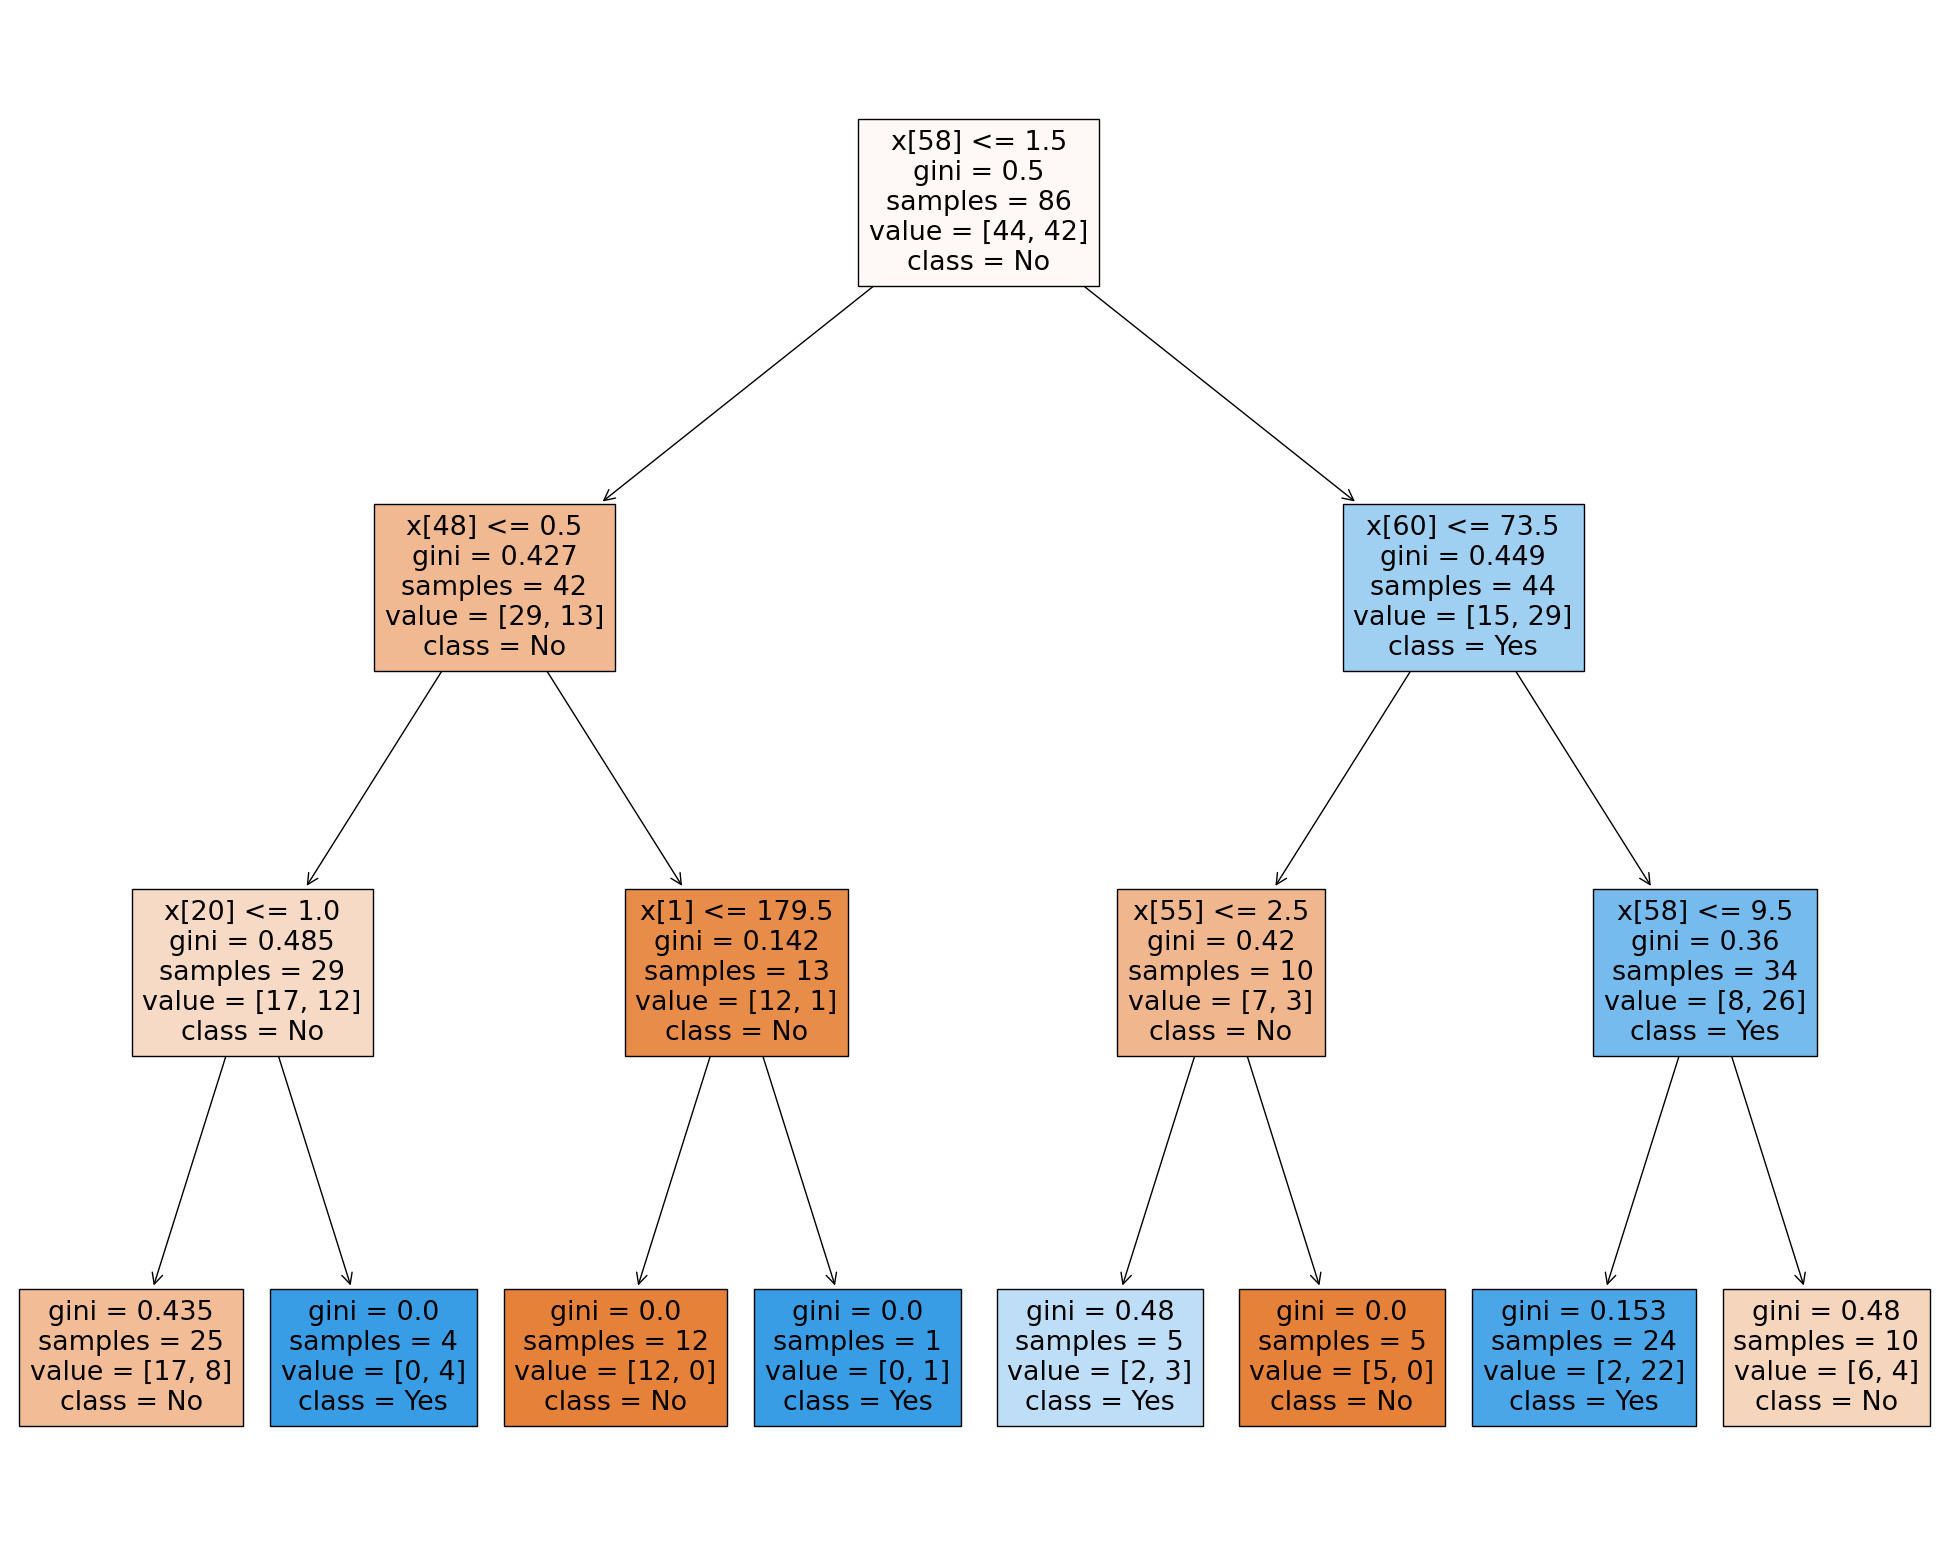

In [23]:
import matplotlib.pyplot as plt

# class_names = True em vez da lista  faz print y(0) e y(1)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, class_names= ["No","Yes"], filled=True)

### 11.2.1 Gravar a Imagem da Árvore

In [24]:
fig.savefig("decision_tree.png")

### 11.2.2 Gravar o log da Árvore para ficheiro

In [25]:
with open("decision_tree.log", "w") as fout:
    fout.write(text_representation)

# 12 Classificação usando o Scikit

In [26]:
from sklearn.feature_selection import VarianceThreshold # Feature selector
from sklearn.pipeline import Pipeline # For setting up pipeline
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score

In [27]:
#Split data for machine learning
X_train, X_test, y_train, y_test = train_test_split(X,  y, 
                                                    test_size = 0.2 ,
                                                    random_state = 1984)
print(X_train.shape)
print(X_test.shape)

(68, 61)
(18, 61)


In [28]:
from sklearn.feature_selection import VarianceThreshold # Feature selector
from sklearn.preprocessing import StandardScaler #for scaling variables
from sklearn.pipeline import Pipeline # For setting up pipeline

#Define a pipeline
pipeline = Pipeline([
('scaler', StandardScaler()),
('selector', VarianceThreshold()),
('TREE', DecisionTreeClassifier())])

## 12.1 usando uma Pipeline

In [29]:
from sklearn import set_config

set_config(display="diagram")
pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('selector', VarianceThreshold()),
                ('TREE', DecisionTreeClassifier())])

In [30]:
# execução da pipeline com parameteros de omissão
pipeline.fit(X_train, y_train)
print('Training set score: ' + str(pipeline.score(X_train,y_train)))
print('Test set score: ' + str(pipeline.score(X_test,y_test)))

Training set score: 1.0
Test set score: 0.5555555555555556


In [31]:
y_pred = pipeline.predict(X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [32]:
y_proba = pipeline.predict_proba(X_test)
y_proba

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [33]:
cm = confusion_matrix(y_test, y_pred)
print(pd.DataFrame(cm,columns = ['pred: No','pred: Yes'],
                   index = ['real: No','real: Yes']))

           pred: No  pred: Yes
real: No          5          5
real: Yes         3          5


In [34]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Precision: 0.500
Recall: 0.625
Accuracy: 0.556


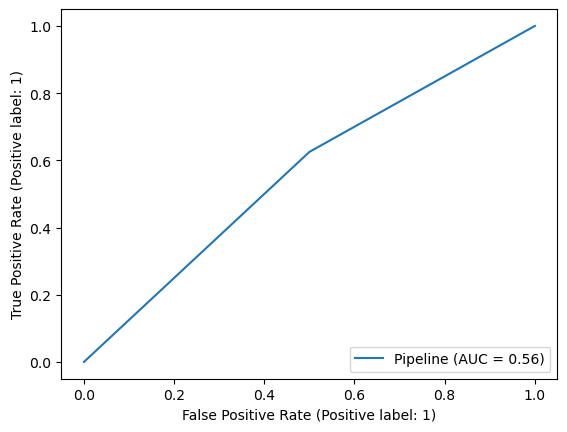

In [47]:
from sklearn.metrics import roc_curve, balanced_accuracy_score
# antes era plot_roc_curve
from sklearn.metrics import RocCurveDisplay

fpr, tpr, thresholds = roc_curve(y_test,
                                       pipeline.predict_proba(X_test)[:,1],)

RocCurveDisplay.from_estimator(pipeline, X_test, y_test)


## 12.2 Sem Pipeline

In [49]:
clf2 = DecisionTreeClassifier(max_depth=2) 

In [50]:
model2 = clf2.fit(X_train, y_train)

In [51]:
y_class = model2.predict(X_test)
y_class

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [52]:
y_class_proba = model2.predict_proba(X_test)
y_class_proba

array([[0.5       , 0.5       ],
       [0.5       , 0.5       ],
       [0.83333333, 0.16666667],
       [0.21428571, 0.78571429],
       [0.83333333, 0.16666667],
       [0.83333333, 0.16666667],
       [0.21428571, 0.78571429],
       [0.83333333, 0.16666667],
       [0.21428571, 0.78571429],
       [0.5       , 0.5       ],
       [0.5       , 0.5       ],
       [0.83333333, 0.16666667],
       [0.5       , 0.5       ],
       [0.21428571, 0.78571429],
       [0.83333333, 0.16666667],
       [0.21428571, 0.78571429],
       [0.21428571, 0.78571429],
       [0.5       , 0.5       ]])

In [53]:
model.predict_proba(X_test)[:, 1]

array([0.91666667, 0.32      , 0.32      , 0.4       , 0.32      ,
       0.        , 0.        , 0.        , 0.91666667, 0.91666667,
       0.4       , 0.32      , 0.91666667, 0.91666667, 0.32      ,
       0.        , 0.4       , 0.        ])

In [54]:
threshold = 0.7
y_pred = (model.predict_proba(X_test)[:, 1] > threshold)
confusion_matrix(y_test, y_pred)

array([[10,  0],
       [ 3,  5]], dtype=int64)

In [55]:
cm_thr70 = confusion_matrix(y_test, y_pred)
print(pd.DataFrame(cm_thr70,columns = ['pred: No','pred: Yes'],
                   index = ['real: No','real: Yes']))

           pred: No  pred: Yes
real: No         10          0
real: Yes         3          5


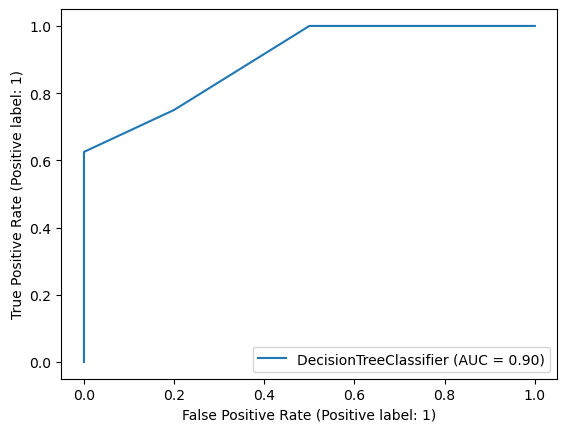

In [57]:
from sklearn.metrics import roc_curve,RocCurveDisplay

fpr, tpr, thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1],
                                 drop_intermediate=False)

RocCurveDisplay.from_estimator(model,X_test,y_test)

In [58]:
print(fpr)
print(tpr)
print(thresholds)

[0.  0.  0.2 0.5 1. ]
[0.    0.625 0.75  1.    1.   ]
[       inf 0.91666667 0.4        0.32       0.        ]


# Gravar o modelo

In [61]:
import pickle

# escolher o nome do ficheiro
filename = "Tree.pickle"

# gravar o modelo
pickle.dump(model, open(filename, "wb"))